In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available else 'cpu')

In [0]:
mean = [0.485, 0.456, 0.405]
std  = [0.229, 0.224, 0.225]

In [0]:
transforms = transforms.Compose([
                                 transforms.Resize(300),
                                 transforms.RandomResizedCrop(299),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean, std)
])

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/dataset_Exp.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/dataset_Exp.zip
  inflating: datasets/datasets.zip   


In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/dataset_Exp.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
!unzip '/content/datasets/datasets.zip'

Streaming output truncated to the last 5000 lines.
  inflating: datasets/natural_images/cat/cat_0633.jpg  
  inflating: datasets/natural_images/cat/cat_0634.jpg  
  inflating: datasets/natural_images/cat/cat_0635.jpg  
  inflating: datasets/natural_images/cat/cat_0636.jpg  
  inflating: datasets/natural_images/cat/cat_0637.jpg  
  inflating: datasets/natural_images/cat/cat_0638.jpg  
  inflating: datasets/natural_images/cat/cat_0639.jpg  
  inflating: datasets/natural_images/cat/cat_0640.jpg  
  inflating: datasets/natural_images/cat/cat_0641.jpg  
  inflating: datasets/natural_images/cat/cat_0642.jpg  
  inflating: datasets/natural_images/cat/cat_0643.jpg  
  inflating: datasets/natural_images/cat/cat_0644.jpg  
  inflating: datasets/natural_images/cat/cat_0645.jpg  
  inflating: datasets/natural_images/cat/cat_0646.jpg  
  inflating: datasets/natural_images/cat/cat_0647.jpg  
  inflating: datasets/natural_images/cat/cat_0648.jpg  
  inflating: datasets/natural_images/cat/cat_0649.jpg

In [0]:
data_dir = '/content/datasets/natural_images'

In [0]:
dataset = datasets.ImageFolder(root = data_dir,
                               transform = transforms)

In [0]:
dataset

Dataset ImageFolder
    Number of datapoints: 6899
    Root location: /content/datasets/natural_images
    StandardTransform
Transform: Compose(
               Resize(size=300, interpolation=PIL.Image.BILINEAR)
               RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.405], std=[0.229, 0.224, 0.225])
           )

In [0]:
len(dataset)


6899

In [0]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size 

In [0]:
print(train_size)
print(test_size)

5519
1380


In [0]:
train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

In [0]:
batch_size = 8
num_worker = 4

In [0]:
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          num_workers = num_worker)

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          num_workers = num_worker)


In [0]:
dataloader = {'train': train_loader,
              'test':test_loader}

In [0]:
total_batch_size = {'train': len(train_loader), 'test': len(test_loader)}

In [0]:
total_batch_size

{'test': 173, 'train': 690}

In [0]:
class_names = dataset.classes

print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [0]:
def imshow(inp, title):

  inp = inp.cpu().numpy().transpose((1, 2, 0))
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)

  plt.figure(figsize = (12, 6))

  plt.imshow(inp)
  plt.title(title)
  plt.pause(5)

In [0]:
inputs, classes = next(iter(dataloader['train']))

In [0]:
out = torchvision.utils.make_grid(inputs)

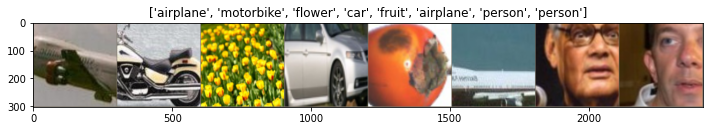

In [0]:
imshow(out, title = [class_names[x] for x in classes])

In [0]:
from torchvision import models

model = models.densenet121(pretrained = True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


In [0]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
num_ftrs = model.classifier.in_features

num_ftrs

1024

In [0]:
model.classifier = nn.Linear(num_ftrs, 8)

In [0]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.001)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)










In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):

    model = model.to(device)
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())

    for epoch in range(num_epochs):
        
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'test']:
            
            if phase == 'train':
                scheduler.step()
                model.train()  
            else:
                model.eval()   

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader[phase]:
                
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    
                    outputs = model(inputs)

                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_batch_size[phase]
            epoch_acc = running_corrects.double() / (total_batch_size[phase] * batch_size)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    print('Training complete')
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    
    return model

In [0]:
model = train_model(model, criterion, optimizer, exp_lr_scheduler,
                    num_epochs = 5)

Epoch 0/4
----------
train Loss: 2.1603 Acc: 0.9274
test Loss: 0.8488 Acc: 0.9632

Epoch 1/4
----------
train Loss: 1.7585 Acc: 0.9377
test Loss: 0.6819 Acc: 0.9711

Epoch 2/4
----------
train Loss: 1.4955 Acc: 0.9491
test Loss: 0.6846 Acc: 0.9689

Epoch 3/4
----------
train Loss: 1.4500 Acc: 0.9458
test Loss: 0.4211 Acc: 0.9819

Epoch 4/4
----------
train Loss: 1.2939 Acc: 0.9536
test Loss: 0.5173 Acc: 0.9783

Training complete
Best val Acc: 0.981936


In [0]:
model.eval()
with torch.no_grad():
    
    
    correct = 0
    total = 0
    
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device) 

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the model on the test images: {}%'\
          .format(100 * correct / total))

Accuracy of the model on the test images: 98.18840579710145%


Actual Label: 1


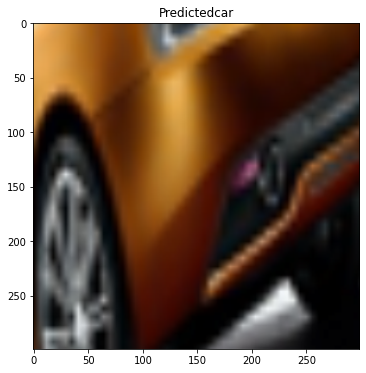

Actual Label: 4


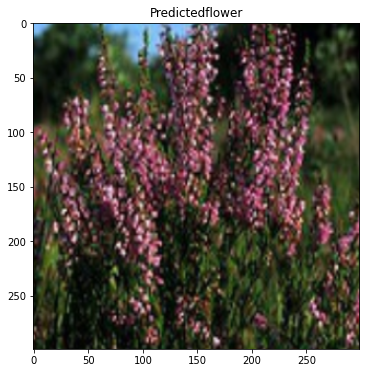

Actual Label: 5


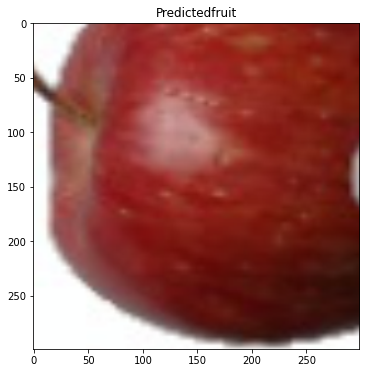

Actual Label: 2


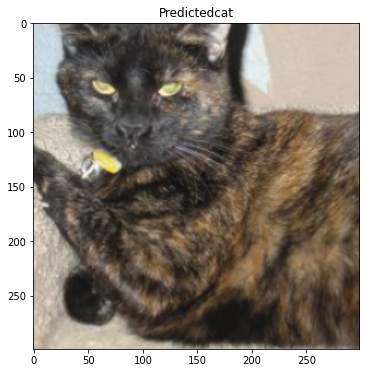

Actual Label: 0


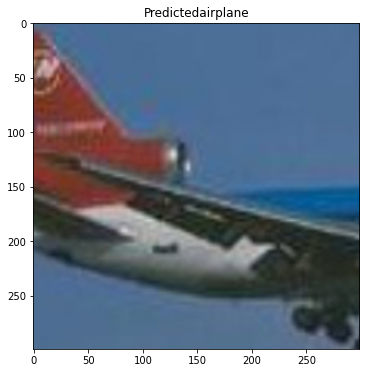

Actual Label: 6


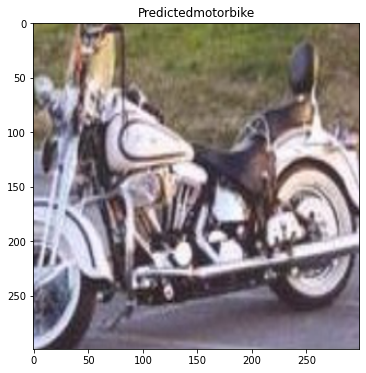

Actual Label: 6


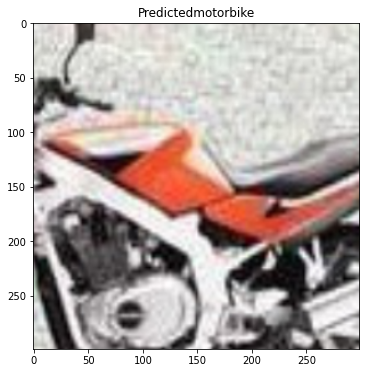

Actual Label: 3


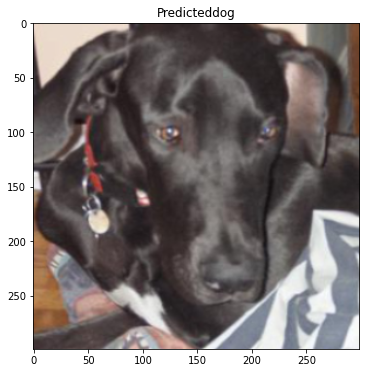

In [0]:
with torch.no_grad():

  inputs, labels = iter(dataloader['test']).next()
  inputs = inputs.to(device)

  inp = torchvision.utils.make_grid(inputs)

  outputs = model(inputs)
  _, preds = torch.max(outputs, 1)

  for j in range(len(inputs)):

    print("Actual Label:", np.array(labels)[j])
    inp = inputs.data[j]
    imshow(inp, "Predicted" + class_names[preds[j]])


